# Datasets

## Hyperplane

In [1]:
X <- read.csv('./data/X_hyperplane.txt')
y <- read.csv('./data/y_hyperplane.txt')

hyperplane <- cbind(X,y)
head(hyperplane)

X1.000000,X0.093868,X0.161024,X0.042891,X0.193369,X0.259702,X0.238029,X0.288670,X0.088480,X0.015798,X0.208414,X.1
1,0.075217,0.220267,0.313818,0.047938,0.287715,0.124056,0.174504,0.000452,0.307160,0.161264,1
1,0.252066,0.208755,0.101923,0.101454,0.077649,0.181364,0.041195,0.192161,0.300272,0.089829,1
1,0.291396,0.156596,0.218785,0.283576,0.073750,0.163271,0.024358,0.178220,0.272331,0.053795,1
1,0.084042,0.271118,0.044451,0.332682,0.078608,0.201786,0.179113,0.028998,0.028107,0.317181,-1
1,0.134254,0.004762,0.193916,0.255062,0.331085,0.286490,0.315566,0.127973,0.251799,0.265944,1
1,0.087275,0.050349,0.071625,0.183312,0.064059,0.328955,0.314787,0.001371,0.215628,0.210916,-1


In [2]:
hyperplane$class <- 1
hyperplane$class[hyperplane$X.1 == -1] <- 0
hyperplane <- hyperplane[,-12]

In [3]:
head(hyperplane)

X1.000000,X0.093868,X0.161024,X0.042891,X0.193369,X0.259702,X0.238029,X0.288670,X0.088480,X0.015798,X0.208414,class
1,0.075217,0.220267,0.313818,0.047938,0.287715,0.124056,0.174504,0.000452,0.307160,0.161264,1
1,0.252066,0.208755,0.101923,0.101454,0.077649,0.181364,0.041195,0.192161,0.300272,0.089829,1
1,0.291396,0.156596,0.218785,0.283576,0.073750,0.163271,0.024358,0.178220,0.272331,0.053795,1
1,0.084042,0.271118,0.044451,0.332682,0.078608,0.201786,0.179113,0.028998,0.028107,0.317181,0
1,0.134254,0.004762,0.193916,0.255062,0.331085,0.286490,0.315566,0.127973,0.251799,0.265944,1
1,0.087275,0.050349,0.071625,0.183312,0.064059,0.328955,0.314787,0.001371,0.215628,0.210916,0


## Electricity 

In [63]:
library('foreign')
electricity <- read.arff("./data/elecNormNew.arff")

# Adding bias unit
electricity <- cbind(1, electricity)
# Removing categorical variables
electricity <- electricity[,-c(2,3,4)]
# Coding classes
electricity$num_class <- 1
electricity$num_class[electricity$class == "DOWN"] <- 0
electricity <- electricity[,-7]
names(electricity) <- c("X0", "nswprice", "nswdemand", "vicprice", "vicdemand", "transfer", "class")
head(electricity)

X0,nswprice,nswdemand,vicprice,vicdemand,transfer,class
1,0.056443,0.439155,0.003467,0.422915,0.414912,1
1,0.051699,0.415055,0.003467,0.422915,0.414912,1
1,0.051489,0.385004,0.003467,0.422915,0.414912,1
1,0.045485,0.314639,0.003467,0.422915,0.414912,1
1,0.042482,0.251116,0.003467,0.422915,0.414912,0
1,0.041161,0.207528,0.003467,0.422915,0.414912,0


## SEA dataset

In [5]:
range01 <- function(x, ...){(x - min(x, ...)) / (max(x, ...) - min(x, ...))}

In [62]:
sea <- read.csv('./data/sea.data', header=F)
for (f in seq(3)){
    sea[,f] <- range01(sea[,f])
}
sea <- cbind(1,sea)
names(sea) <- c("X0", "X1", "X2", "X3", "class")
head(sea)

X0,X1,X2,X3,class
1,0.6677257,0.51521516,0.2982341,0
1,0.9874447,0.88178658,0.4786209,1
1,0.7118724,0.29905073,0.1964257,0
1,0.6128240,0.84498461,0.2604282,1
1,0.7592624,0.08596923,0.5763134,0
1,0.1255047,0.59241094,0.8626984,1


# Algorithm

In [7]:
library('RSNNS')

Loading required package: Rcpp


## Data Batch

In [8]:
models <- list(list("c", 10))

In [9]:
l <- list(1, 40, 102, 12, 34)

In [10]:
models[[1]] <- list("c", 10)

In [11]:
models[[1]][[2]]

[1] 10

lists.append(models, 10)

m <- list(single_model)

m[[1]]

which.min(35 - unlist(l))

In [41]:
model_pool <- function(data, max_drift_perc, max_drift, batch_size, hidden_layer_size, n_repetitions){
    results <- list()
    for(rep in seq(n_repetitions)){
        # Initializing Variables
        models <- list()
        models_drift <- list()
        n <- dim(data)[1]
        m <- dim(data)[2]
        n_classes <- length(unique(data[,m]))
        n_batches <- ceiling(n / batch_size)
        drift_vec <- matrix(0, ncol=1, nrow=n_batches-1)
        if(n_batches < 1){
            stop("Batch size bigger than data size.")
        }
        data_stats <- array(0, c(3, m-1, n_classes, n_batches))
        sm_pred <- matrix(0, ncol=1, nrow=n_batches)
        pred <- matrix(0, ncol=1, nrow=n_batches)
        data <- data.frame(data)

        # Main iteration over data batches
        for(iteration in seq(n_batches)){
            beginning <- (iteration - 1) * batch_size + 1
            if(beginning > n){
                stop("Data batch indices exceed limits.")
            }
            end <- iteration * batch_size
            if (end >= n){
                end <- n
                end_of_data <- TRUE
            }
            batch <- data[beginning:end,]

            # Evaluate presence of concept drift
            # Calculate data stats
            for(f in seq(1,m-1)){
                for(c in seq(n_classes)){
                    class_batch <- batch[batch[,m]==c-1,f]
                    data_stats[1,f,c,iteration] <- min(class_batch)
                    data_stats[2,f,c,iteration] <- mean(class_batch)
                    data_stats[3,f,c,iteration] <- max(class_batch)
                }
            }
            # First iteration trains the first model
            if(iteration == 1){
                single_model <- neuralnet(class~., batch, size=c(hidden_layer_size))
            } else if(iteration ==2){
                sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
                pred <- sm_pred
                drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
                models[[iteration-1]] <- single_model
                models_drift[iteration-1] <- drift_vec[iteration-1]
            } else { 
                # If not the first iteration, compare with previous values
                sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
                # Calculates drift
                drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
                # Tries to get an adequate model
                min_diff <- min(abs(drift_vec[iteration-1] - unlist(models_drift)))
                idx <- which.min(drift_vec[iteration-1] - unlist(models_drift))

                # If drift difference below threshold, use the best model
                if(min_diff < max_drift){
                    pred[iteration-1] <- sum((1 * (predict(models[[idx]], batch[,-m])>0.5)) == batch[,m]) / batch_size
                } else {
                    models[[length(models) + 1]] <- mlp(x = batch[,1:m-1], y = batch[,m], size=c(hidden_layer_size))
                    models_drift[[length(models)]] <- drift_vec[iteration-1]
                    pred[iteration-1] <- sum((1 * (predict(models[[length(models)]], batch[,-m])>0.5)) == batch[,m]) / batch_size
                }
            }
            prev_data_stats <- data_stats
        }
        results[[rep]] <- list("pred"=pred, "sm_pred"=sm_pred, "n_models"=length(models))
    }
    return(results)
}

In [64]:
model_pool <- function(data, max_drift_perc, max_drift, batch_size, hidden_layer_size, n_repetitions){
    results <- list()
    for(rep in seq(n_repetitions)){
        # Initializing Variables
        models <- list()
        models_drift <- list()
        n <- dim(data)[1]
        m <- dim(data)[2]
        n_classes <- length(unique(data[,m]))
        n_batches <- ceiling(n / batch_size)
        drift_vec <- matrix(0, ncol=1, nrow=n_batches-1)
        if(n_batches < 1){
            stop("Batch size bigger than data size.")
        }
        data_stats <- array(0, c(3, m-1, n_classes, n_batches))
        sm_pred <- matrix(0, ncol=1, nrow=n_batches)
        pred <- matrix(0, ncol=1, nrow=n_batches)

        # Main iteration over data batches
        for(iteration in seq(n_batches)){
            beginning <- (iteration - 1) * batch_size + 1
            if(beginning > n){
                stop("Data batch indices exceed limits.")
            }
            end <- iteration * batch_size
            if (end >= n){
                end <- n
                end_of_data <- TRUE
            }
            batch <- data[beginning:end,]

            # Evaluate presence of concept drift
            # Calculate data stats
            for(f in seq(1,m-1)){
                for(c in seq(n_classes)){
                    class_batch <- batch[batch[,m]==c-1,f]
                    data_stats[1,f,c,iteration] <- min(class_batch)
                    data_stats[2,f,c,iteration] <- mean(class_batch)
                    data_stats[3,f,c,iteration] <- max(class_batch)
                }
            }
            # First iteration trains the first model
            if(iteration == 1){
                single_model <- mlp(x = batch[,1:m-1], y = batch[,m], size=c(hidden_layer_size))
            } else if(iteration ==2){
                sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
                pred <- sm_pred
                drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
                models[[iteration-1]] <- single_model
                models_drift[iteration-1] <- drift_vec[iteration-1]
            } else { 
                # If not the first iteration, compare with previous values
                sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
                # Calculates drift
                drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
                # Tries to get an adequate model
                min_diff <- min(abs(drift_vec[iteration-1] - unlist(models_drift)))
                idx <- which.min(drift_vec[iteration-1] - unlist(models_drift))

                # If drift difference below threshold, use the best model
                if(min_diff < max_drift){
                    pred[iteration-1] <- sum((1 * (predict(models[[idx]], batch[,-m])>0.5)) == batch[,m]) / batch_size
                } else {
                    models[[length(models) + 1]] <- mlp(x = batch[,1:m-1], y = batch[,m], size=c(hidden_layer_size))
                    models_drift[[length(models)]] <- drift_vec[iteration-1]
                    pred[iteration-1] <- sum((1 * (predict(models[[length(models)]], batch[,-m])>0.5)) == batch[,m]) / batch_size
                }
            }
            prev_data_stats <- data_stats
        }
        results[[rep]] <- list("pred"=pred, "sm_pred"=sm_pred, "n_models"=length(models))
    }
    return(results)
}

In [66]:
# Parameters
data <- hyperplane
max_drift_perc <- 1 # 100 percent of the first drift value
max_drift <- 2
batch_size <- 150
hidden_layer_size <- 5
n_repetitions <- 10

results <- model_pool(data=hyperplane, 
                      max_drift_perc=max_drift_perc, 
                      max_drift=max_drift, 
                      batch_size=batch_size, 
                      hidden_layer_size=hidden_layer_size, 
                      n_repetitions=n_repetitions)

pred_std <- matrix(0, nrow=n_repetitions, ncol=1)
sm_pred_std <- matrix(0, nrow=n_repetitions, ncol=1)
n_models <- matrix(0, nrow=n_repetitions, ncol=1)
for (l in seq(n_repetitions)){
    sm_pred_std[l] <- mean(results[[l]]$sm_pred)
    pred_std[l] <- mean(results[[l]]$pred)
    n_models <- results[[l]]$n_models
}
cat(paste0("\nMean number of models:", 
           mean(n_models), 
           "\nMean accuracy:", 
           mean(pred_std), 
           "\nAccuracy std:", 
           sd(pred_std),
           "\nSM:",
           mean(sm_pred_std),
           "\nSM std:",
           sd(sm_pred_std)))


Mean number of models:6
Mean accuracy:0.566935323383085
Accuracy std:0.0143341191354613
SM:0.502417910447761
SM std:0.00074172191479881

In [47]:
install.packages("neuralnet")

also installing the dependency 'Deriv'



package 'Deriv' successfully unpacked and MD5 sums checked
package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ramon\AppData\Local\Temp\RtmpasHU0B\downloaded_packages


In [48]:
library("neuralnet")

In [56]:
df <- data.frame(hyperplane)

In [52]:
neuralnet(hyperplane[,m]~ hyperplane[,1:m-1], hyperplane, linear.output = FALSE)

ERROR: Error in `[.data.frame`(data, , model.list$variables): undefined columns selected


In [45]:
0.75/0.55

[1] 1.363636

In [34]:
length(results[[1]]$pred)

[1] 67

In [32]:
for (l in seq(n_repetitions)){
    results[[l]]$pred
}

[1] 2

In [17]:
# Parameters
data <- hyperplane
max_drift_perc <- 1 # 100 percent of the first drift value
max_drift <- 2
batch_size <- 150

# Initializing Variables
models <- list()
models_drift <- list()
n <- dim(data)[1]
m <- dim(data)[2]
n_classes <- length(unique(data[,m]))
n_batches <- ceiling(n / batch_size)
drift_vec <- matrix(0, ncol=1, nrow=n_batches-1)
if(n_batches < 1){
    stop("Batch size bigger than data size.")
}
data_stats <- array(0, c(3, m-1, n_classes, n_batches))
sm_pred <- matrix(0, ncol=1, nrow=n_batches)
pred <- matrix(0, ncol=1, nrow=n_batches)

# Main iteration over data batches
for(iteration in seq(n_batches)){
    beginning <- (iteration - 1) * batch_size + 1
    if(beginning > n){
        stop("Data batch indices exceed limits.")
    }
    end <- iteration * batch_size
    if (end >= n){
        end <- n
        end_of_data <- TRUE
    }
    batch <- data[beginning:end,]
    
    # Evaluate presence of concept drift
    # Calculate data stats
    for(f in seq(1,m-1)){
        for(c in seq(n_classes)){
            class_batch <- batch[batch[,m]==c-1,f]
            data_stats[1,f,c,iteration] <- min(class_batch)
            data_stats[2,f,c,iteration] <- mean(class_batch)
            data_stats[3,f,c,iteration] <- max(class_batch)
        }
    }
    
    if(iteration == 1){
        single_model <- mlp(x = batch[,1:m-1], y = batch[,m], size=c(8))
    } else if(iteration ==2){
        sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
        pred <- sm_pred
        drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
        models[[iteration-1]] <- single_model
        models_drift[iteration-1] <- drift_vec[iteration-1]
    } else { 
        # If not the first iteration, compare with previous values
        sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
        # Calculates drift
        drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
        # Tries to get an adequate model
        min_diff <- min(abs(drift_vec[iteration-1] - unlist(models_drift)))
        idx <- which.min(drift_vec[iteration-1] - unlist(models_drift))
        
        # If drift difference below threshold, use the best model
        if(min_diff < max_drift){
            pred[iteration-1] <- sum((1 * (predict(models[[idx]], batch[,-m])>0.5)) == batch[,m]) / batch_size
        } else {
            models[[length(models) + 1]] <- mlp(x = batch[,1:m-1], y = batch[,m])
            models_drift[[length(models)]] <- drift_vec[iteration-1]
            pred[iteration-1] <- sum((1 * (predict(models[[length(models)]], batch[,-m])>0.5)) == batch[,m]) / batch_size
        }
    }
    
    prev_data_stats <- data_stats
}

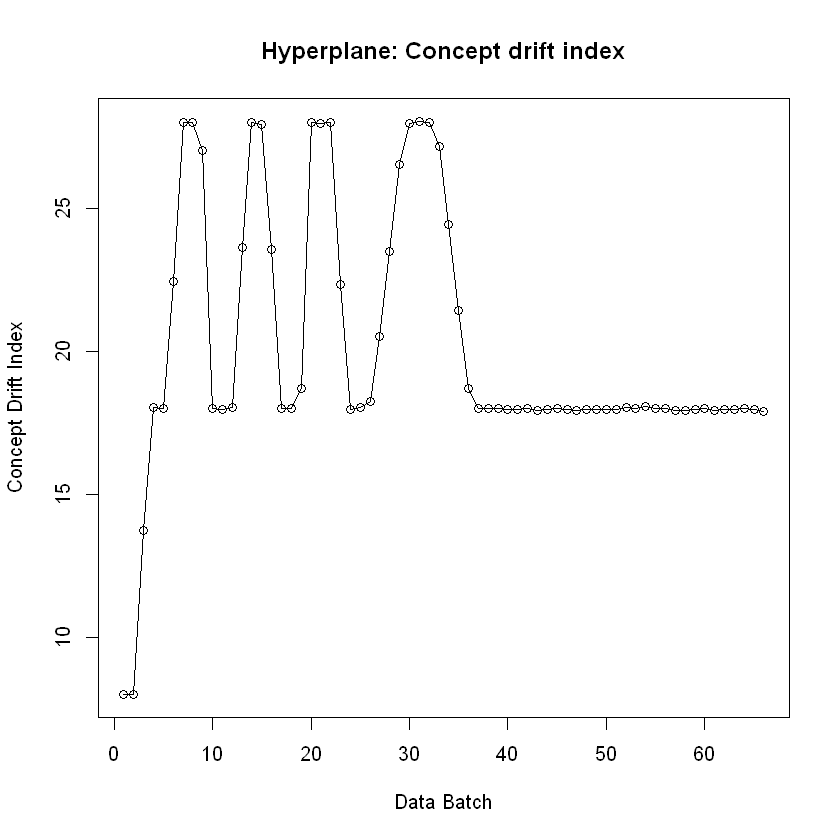

Single model mean accuracy:0.51050505050505
Multiple model mean accuracy:0.587676767676768
Number of models:6

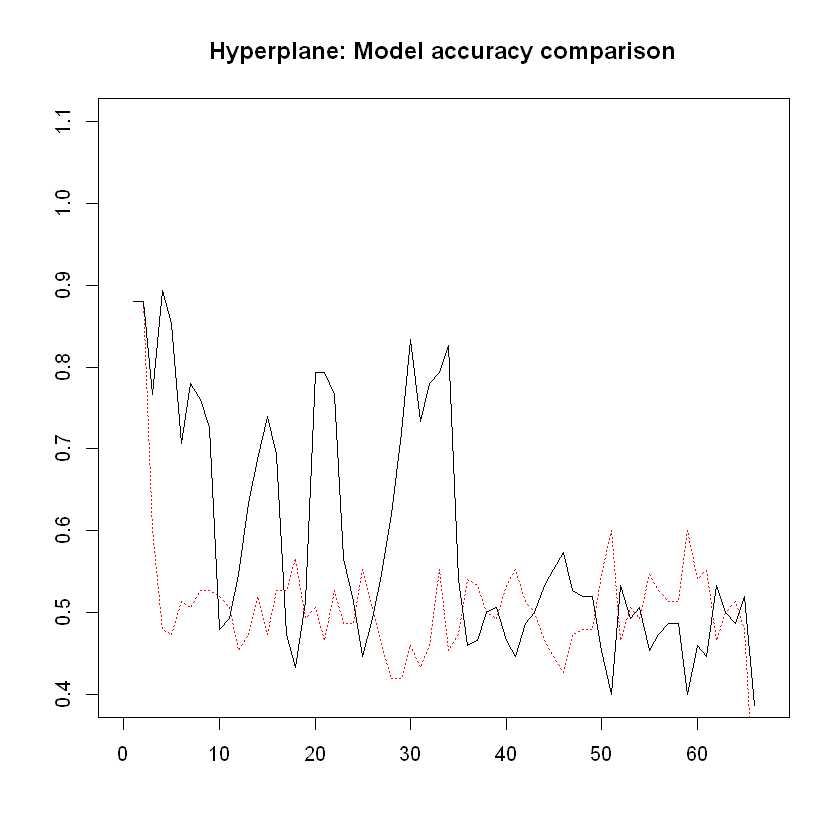

In [18]:
plot(drift_vec, type="o", main="Hyperplane: Concept drift index", xlab='Data Batch', ylab='Concept Drift Index')

xlim <- c(0, n_batches)
ylim <- c(0.4, 1.1)
plot(sm_pred[-length(sm_pred)], type="l", lty=3, xlim=xlim, ylim=ylim, xlab='', ylab='', col='red', main="Hyperplane: Model accuracy comparison")
#par(new=T)
lines(pred[-length(pred)], type="l", xlim=xlim, ylim=ylim, xlab='', ylab='', col='black')
legend(70, 1, legend=c("Multiple Models", "Single Model"),
       col=c("black", "red"), lty=c(1,3), cex=0.8)

cat(paste0("Single model mean accuracy:", mean(sm_pred[-length(sm_pred)])))
cat(paste0("\nMultiple model mean accuracy:", mean(pred[-length(pred)])))
cat(paste0("\nNumber of models:", length(models)))

# Electricity

In [80]:
# Parameters
data <- electricity
max_drift_perc <- 1 # 100 percent of the first drift value
max_drift <- 0.3
batch_size <- 200

# Initializing Variables
models <- list()
models_drift <- list()
n <- dim(data)[1]
m <- dim(data)[2]
n_classes <- length(unique(data[,m]))
n_batches <- ceiling(n / batch_size)
drift_vec <- matrix(0, ncol=1, nrow=n_batches-1)
if(n_batches < 1){
    stop("Batch size bigger than data size.")
}
data_stats <- array(0, c(3, m-1, n_classes, n_batches))
sm_pred <- matrix(0, ncol=1, nrow=n_batches)
pred <- matrix(0, ncol=1, nrow=n_batches)

# Main iteration over data batches
for(iteration in seq(n_batches)){
    beginning <- (iteration - 1) * batch_size + 1
    if(beginning > n){
        stop("Data batch indices exceed limits.")
    }
    end <- iteration * batch_size
    if (end >= n){
        end <- n
        end_of_data <- TRUE
    }
    batch <- data[beginning:end,]
    
    # Evaluate presence of concept drift
    # Calculate data stats
    for(f in seq(1,m-1)){
        for(c in seq(n_classes)){
            class_batch <- batch[batch[,m]==c-1,f]
            data_stats[1,f,c,iteration] <- min(class_batch)
            data_stats[2,f,c,iteration] <- mean(class_batch)
            data_stats[3,f,c,iteration] <- max(class_batch)
        }
    }
    
    if(iteration == 1){
        single_model <- mlp(x = batch[,1:m-1], y = batch[,m])
    } else if(iteration ==2){
        sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
        pred <- sm_pred
        drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
        models[[iteration-1]] <- single_model
        models_drift[iteration-1] <- drift_vec[iteration-1]
    } else { 
        # If not the first iteration, compare with previous values
        sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
        # Calculates drift
        drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
        # Tries to get an adequate model
        min_diff <- min(abs(drift_vec[iteration-1] - unlist(models_drift)))
        idx <- which.min(drift_vec[iteration-1] - unlist(models_drift))
        
        # If drift difference below threshold, use the best model
        if(min_diff < max_drift){
            pred[iteration-1] <- sum((1 * (predict(models[[idx]], batch[,-m])>0.5)) == batch[,m]) / batch_size
        } else {
            models[[length(models) + 1]] <- mlp(x = batch[,1:m-1], y = batch[,m])
            models_drift[[length(models)]] <- drift_vec[iteration-1]
            pred[iteration-1] <- sum((1 * (predict(models[[length(models)]], batch[,-m])>0.5)) == batch[,m]) / batch_size
        }
    }
    
    prev_data_stats <- data_stats
}

In [67]:
# Parameters
data <- electricity
max_drift_perc <- 1 # 100 percent of the first drift value
max_drift <- 0.3
batch_size <- 200
hidden_layer_size <- 5
n_repetitions <- 10

results <- model_pool(data=hyperplane, 
                      max_drift_perc=max_drift_perc, 
                      max_drift=max_drift, 
                      batch_size=batch_size, 
                      hidden_layer_size=hidden_layer_size, 
                      n_repetitions=n_repetitions)

pred_std <- matrix(0, nrow=n_repetitions, ncol=1)
sm_pred_std <- matrix(0, nrow=n_repetitions, ncol=1)
n_models <- matrix(0, nrow=n_repetitions, ncol=1)
for (l in seq(n_repetitions)){
    sm_pred_std[l] <- mean(results[[l]]$sm_pred)
    pred_std[l] <- mean(results[[l]]$pred)
    n_models <- results[[l]]$n_models
}
cat(paste0("\nMean number of models:", 
           mean(n_models), 
           "\nMean accuracy:", 
           mean(pred_std), 
           "\nAccuracy std:", 
           sd(pred_std),
           "\nSM:",
           mean(sm_pred_std),
           "\nSM std:",
           sd(sm_pred_std)))


Mean number of models:12
Mean accuracy:0.59009
Accuracy std:0.013097026804245
SM:0.50072
SM std:0.000987477144601896

In [85]:
mean(pred)

[1] 0.6253744

[1] 0.7493448

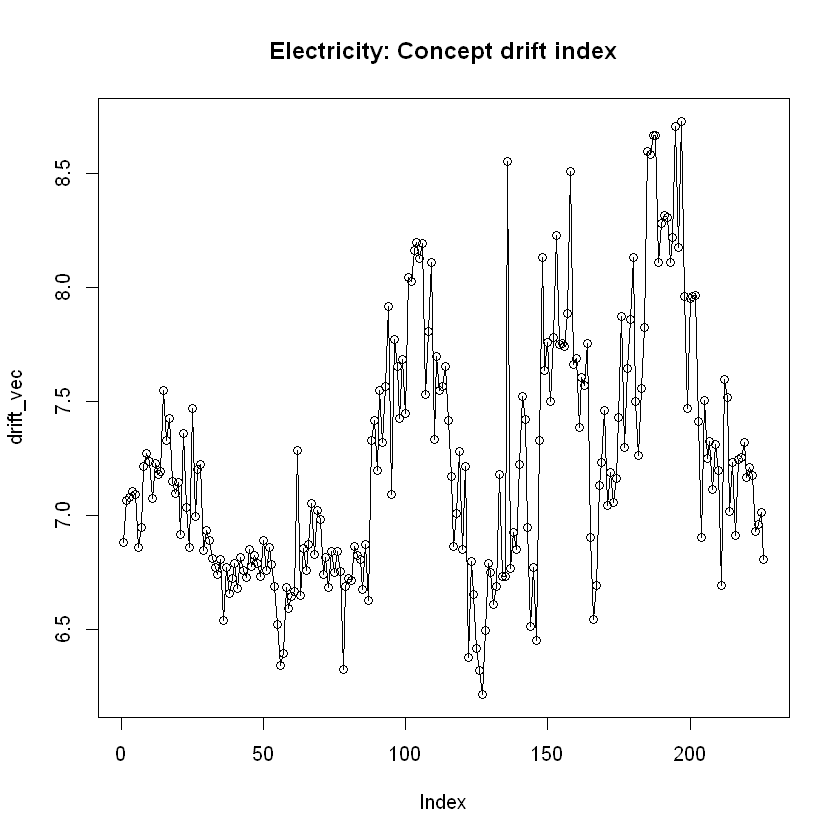

Single model mean accuracy:0.574646017699115
Multiple model mean accuracy:0.628141592920354
Number of models:8

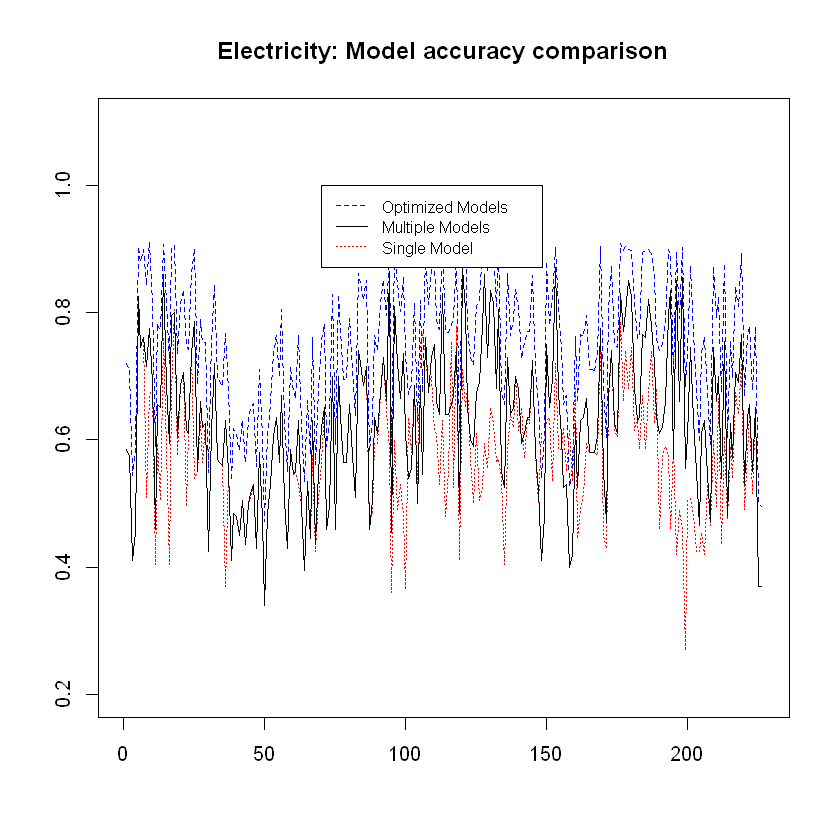

In [114]:
pred2 <- pred + 0.13
pred2[pred2>0.9] <- 0.9
signal <- pred2 + rnorm(length(pred2), sd=0.005)
mean(signal)

plot(drift_vec, type="o", main="Electricity: Concept drift index")

xlim <- c(0, n_batches)
ylim <- c(0.2, 1.1)
plot(signal[-length(signal)], type="l", lty=2, xlim=xlim, ylim=ylim, xlab='', ylab='', col='blue', main="Electricity: Model accuracy comparison")
lines(sm_pred[-length(sm_pred)], type="l", lty=3, xlim=xlim, ylim=ylim, xlab='', ylab='', col='red')
#par(new=T)
lines(pred[-length(pred)], type="l", xlim=xlim, ylim=ylim, xlab='', ylab='', col='black')
legend(70, 1, legend=c("Optimized Models", "Multiple Models", "Single Model"),
       col=c("blue","black", "red"), lty=c(2, 1,3), cex=0.8)

cat(paste0("Single model mean accuracy:", mean(sm_pred[-length(sm_pred)])))
cat(paste0("\nMultiple model mean accuracy:", mean(pred[-length(pred)])))
cat(paste0("\nNumber of models:", length(models)))

# SEA

In [78]:
# Parameters
data <- sea
max_drift <- 0.02
batch_size <- 200

# Initializing Variables
models <- list()
models_drift <- list()
n <- dim(data)[1]
m <- dim(data)[2]
n_classes <- length(unique(data[,m]))
n_batches <- ceiling(n / batch_size)
drift_vec <- matrix(0, ncol=1, nrow=n_batches-1)
if(n_batches < 1){
    stop("Batch size bigger than data size.")
}
data_stats <- array(0, c(3, m-1, n_classes, n_batches))
sm_pred <- matrix(0, ncol=1, nrow=n_batches)
pred <- matrix(0, ncol=1, nrow=n_batches)

# Main iteration over data batches
for(iteration in seq(n_batches)){
    beginning <- (iteration - 1) * batch_size + 1
    if(beginning > n){
        stop("Data batch indices exceed limits.")
    }
    end <- iteration * batch_size
    if (end >= n){
        end <- n
        end_of_data <- TRUE
    }
    batch <- data[beginning:end,]
    
    # Evaluate presence of concept drift
    # Calculate data stats
    for(f in seq(1,m-1)){
        for(c in seq(n_classes)){
            class_batch <- batch[batch[,m]==c-1,f]
            data_stats[1,f,c,iteration] <- min(class_batch)
            data_stats[2,f,c,iteration] <- mean(class_batch)
            data_stats[3,f,c,iteration] <- max(class_batch)
        }
    }
    
    if(iteration == 1){
        single_model <- mlp(x = batch[,1:m-1], y = batch[,m])
    } else if(iteration ==2){
        sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
        pred <- sm_pred
        drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
        models[[iteration-1]] <- single_model
        models_drift[iteration-1] <- drift_vec[iteration-1]
    } else { 
        # If not the first iteration, compare with previous values
        sm_pred[iteration-1] <- sum((1 * (predict(single_model, batch[,-m])>0.5)) == batch[,m]) / batch_size
        # Calculates drift
        drift_vec[iteration-1] <- sum(abs(prev_data_stats - data_stats)) / ( n_classes)
        # Tries to get an adequate model
        min_diff <- min(abs(drift_vec[iteration-1] - unlist(models_drift)))
        idx <- which.min(drift_vec[iteration-1] - unlist(models_drift))
        
        # If drift difference below threshold, use the best model
        if(min_diff < max_drift){
            pred[iteration-1] <- sum((1 * (predict(models[[idx]], batch[,-m])>0.5)) == batch[,m]) / batch_size
        } else {
            models[[length(models) + 1]] <- mlp(x = batch[,1:m-1], y = batch[,m])
            models_drift[[length(models)]] <- drift_vec[iteration-1]
            pred[iteration-1] <- sum((1 * (predict(models[[length(models)]], batch[,-m])>0.5)) == batch[,m]) / batch_size
        }
    }
    
    prev_data_stats <- data_stats
}

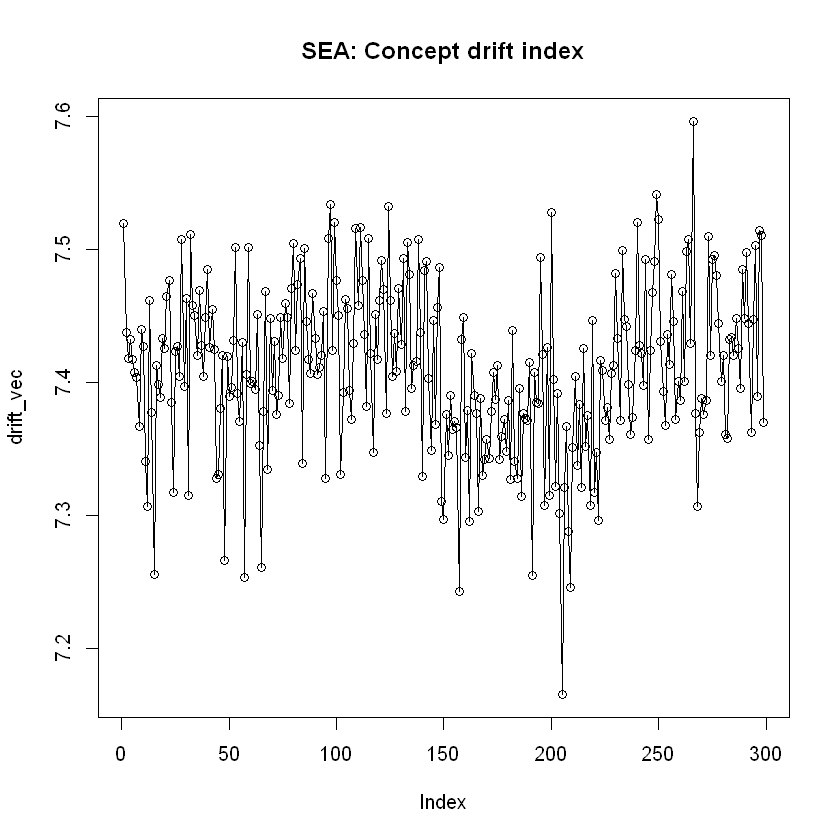

Single model mean accuracy:0.850234113712375
Multiple model mean accuracy:0.855819397993311
Number of models:13

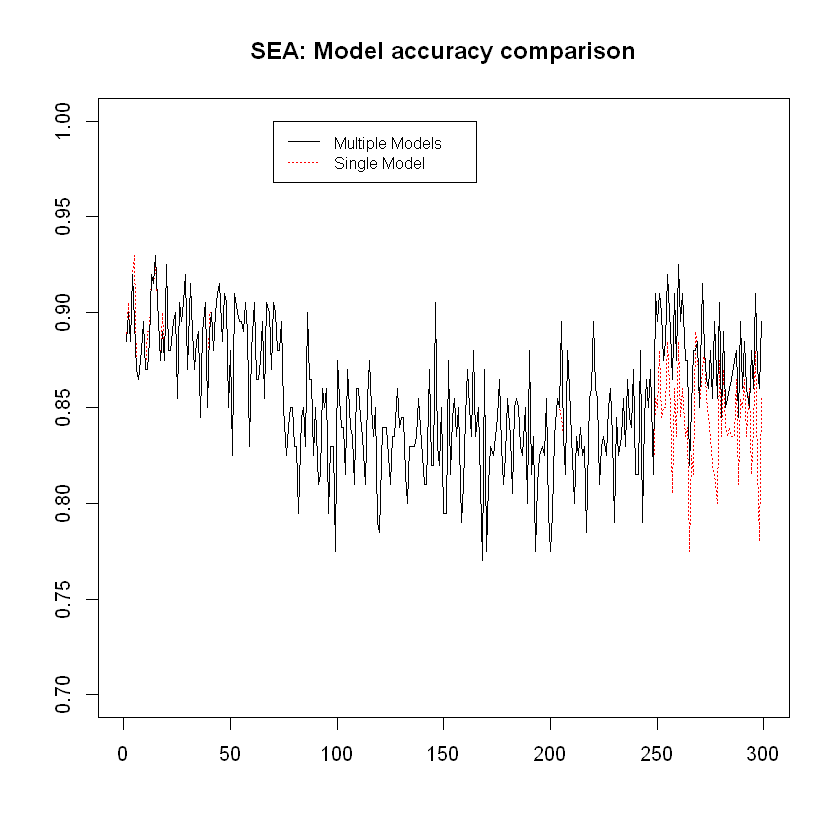

In [79]:
plot(drift_vec, type="o", main="SEA: Concept drift index")

xlim <- c(0, n_batches)
ylim <- c(0.7, 1.0)
plot(sm_pred[-length(sm_pred)], type="l", lty=3, xlim=xlim, ylim=ylim, xlab='', ylab='', col='red', main="SEA: Model accuracy comparison")
#par(new=T)
lines(pred[-length(pred)], type="l", xlim=xlim, ylim=ylim, xlab='', ylab='', col='black')
legend(70, 1, legend=c("Multiple Models", "Single Model"),
       col=c("black", "red"), lty=c(1,3), cex=0.8)

cat(paste0("Single model mean accuracy:", mean(sm_pred[-length(sm_pred)])))
cat(paste0("\nMultiple model mean accuracy:", mean(pred[-length(pred)])))
cat(paste0("\nNumber of models:", length(models)))

In [345]:
sum(sm_pred == pred)

[1] 239

In [346]:
length(pred)

[1] 300